<a href="https://colab.research.google.com/github/jrspatel/ML_Algo/blob/main/Logistic_code__final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from sklearn.model_selection import train_test_split

In [ ]:
@dataclass
class LogisticRegression:
    X:np.matrix
    y:np.array
    epsilon:np.float32
    learningRate:np.float32
    maxIteration:int
    def __post_init__(self):
      self.X_train,self.X_test,self.y_train,self.y_test=self.split_data()
    def split_data(self):
      X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        stratify=self.y)
      return X_train,X_test,y_train,y_test
    def remove_index(self,X_train,y_train,i):
      self.X_train=self.X_train.drop(i,axis=0)
      self.y_train=self.y_train.drop(i,axis=0)
      return X_train,y_train

    def add_X0(self,X):
      return np.column_stack([np.ones((X.shape[0],1)), X])

    def sigmoid(self,z):
      sig=1/(1+np.exp(-z))
      return sig

    def costFunction(self,X,y):
      sig=self.sigmoid(X.dot(self.w))
      loss= y * np.log(sig)+ (1-y) * np.log(1-sig)
      cost= -(loss.sum())
      return cost
    def gradient(self,X,y):
      sig=self.sigmoid(X.dot(self.w))
      return (sig-y).dot(X)
    def gradientDescent(self,X,y):
        errors=[]
        prev_error=float('inf')
        for i in tqdm(range(self.maxIteration),colour='red'):
          self.w=self.w-(self.learningRate * self.gradient(X,y))
          current_error=self.costFunction(X,y)
          errors.append(current_error)
          if np.abs(prev_error-current_error)< self.epsilon:
            print('The model stopped learning')
            break
          prev_error=current_error
        self.plot_cost(errors)

    def plot_cost(self,cost_sequence):

        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t,s)

        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()

    def predict(self, X):
          sig=self.sigmoid(X.dot(self.w))
          return np.around(sig)
    def evalaute(self,y,y_hat):
          y= (y==1)
          y_hat= (y_hat==1)
          precision =(y & y_hat).sum()/ y_hat.sum()
          recall=(y & y_hat).sum()/ y.sum()
          f1_score=2*precision*recall/(precision + recall)
          return precision,recall,f1_score

    def fit(self):
          #self.remove_index(self.X_train,self.y_train,1)
          #self.remove_index(self.X_train,self.y_train,38)
          #self.X_train,self.y_train=self.remove_index(1)
          #self.X_train,self.y_train=self.remove_index(38)
          self.X_train , self.X_test, self.y_train, self.y_test = self.split_data()
          self.remove_index(self.X_train,self.y_train,1)
          self.remove_index(self.X_train,self.y_train,38)
          self.w=np.ones(self.X_train.shape[1],dtype=np.float64) * 0
          self.gradientDescent(self.X_train,self.y_train)
          print(self.w)
          y_hat_train=self.predict(self.X_train)
          precision,recall,f1_score=self.evalaute(self.y_train,y_hat_train)
          print('the model has precision of {}'.format(precision))
          print('the model has recall of {}'.format(recall))
          print('the model has f1_score of {}'.format(f1_score))

    def plot(self):
          plt.figure(figsize=(12,8))
          ax = plt.axes(projection='3d')

            # Data for three-dimensional scattered points
          ax.scatter3D(self.X_train.iloc[:, 0], self.X_train.iloc[:, 1],
                        self.sigmoid(self.X_train.dot(self.w)),
                        c = self.y_train.iloc[:], cmap='viridis', s=100);

          ax.set_xlim3d(55, 80)
          ax.set_ylim3d(80, 240)
          plt.xlabel('$x_1$ feature', fontsize=15)
          plt.ylabel('$x_2$ feature', fontsize=15, )
          ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    def scatterPlt(self):
            # evenly sampled points
            x_min, x_max = 55, 80
            y_min, y_max = 80, 240

            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                                np.linspace(y_min, y_max, 250))
            grid = np.c_[xx.ravel(), yy.ravel()]
            probs = grid.dot(self.w).reshape(xx.shape)

            f, ax = plt.subplots(figsize=(14,12))


            ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


            ax.scatter(self.X_train.iloc[:, 0], self.X_train.iloc[:, 1],
                      c=self.y_train.iloc[:], s=50,
                      cmap="RdBu", vmin=-.2, vmax=1.2,
                      edgecolor="white", linewidth=1)

            plt.xlabel('x1 feature')
            plt.ylabel('x2 feature')

    def plot3D(self):
            # evenly sampled points
              x_min, x_max = 55, 80
              y_min, y_max = 80, 240

              xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                                  np.linspace(y_min, y_max, 250))

              grid = np.c_[xx.ravel(), yy.ravel()]
              print(xx.shape)
              probs = grid.dot(self.w).reshape(xx.shape)
              fig = plt.figure(figsize=(14,12))
              ax = plt.axes(projection='3d')
              ax.contour3D(xx, yy, probs, 50, cmap='binary')

              ax.scatter3D(self.X_train.iloc[:, 0], self.X_train.iloc[:, 1],
                        c=self.y_train.iloc[:], s=50,
                        cmap="RdBu", vmin=-.2, vmax=1.2,
                        edgecolor="white", linewidth=1)

              ax.set_xlabel('x1')
              ax.set_ylabel('x2')
              ax.set_zlabel('probs')
              ax.set_title('3D contour')
              plt.show()

100%|██████████| 100000/100000 [05:21<00:00, 310.83it/s]


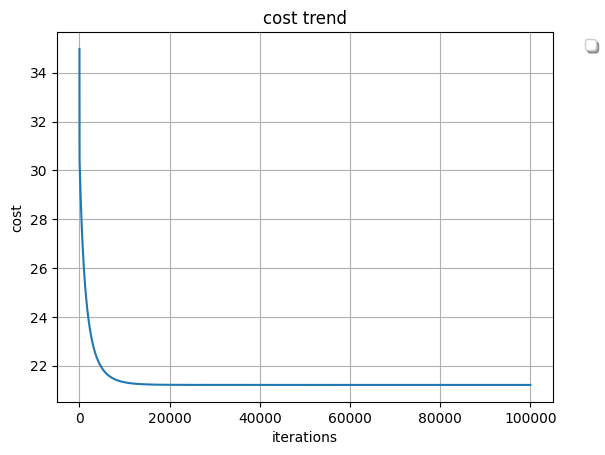

x1   -0.247964
x2    0.122814
dtype: float64
the model has precision of 0.8679245283018868
the model has recall of 0.92
the model has f1_score of 0.8932038834951457
(250, 250)


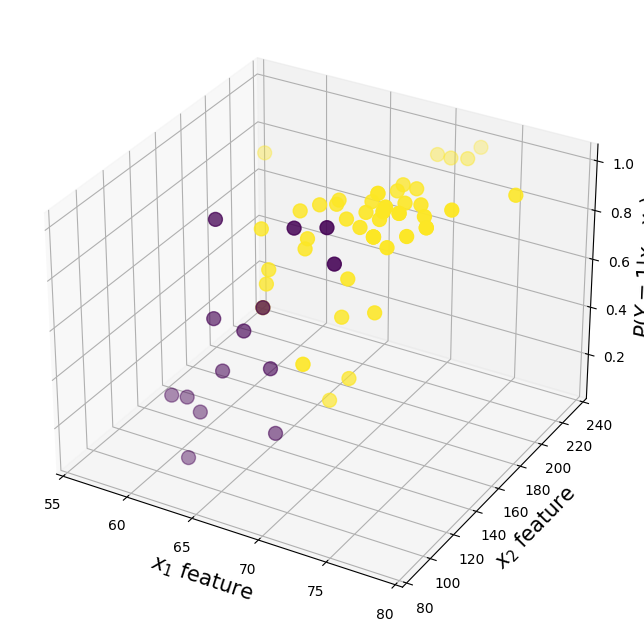

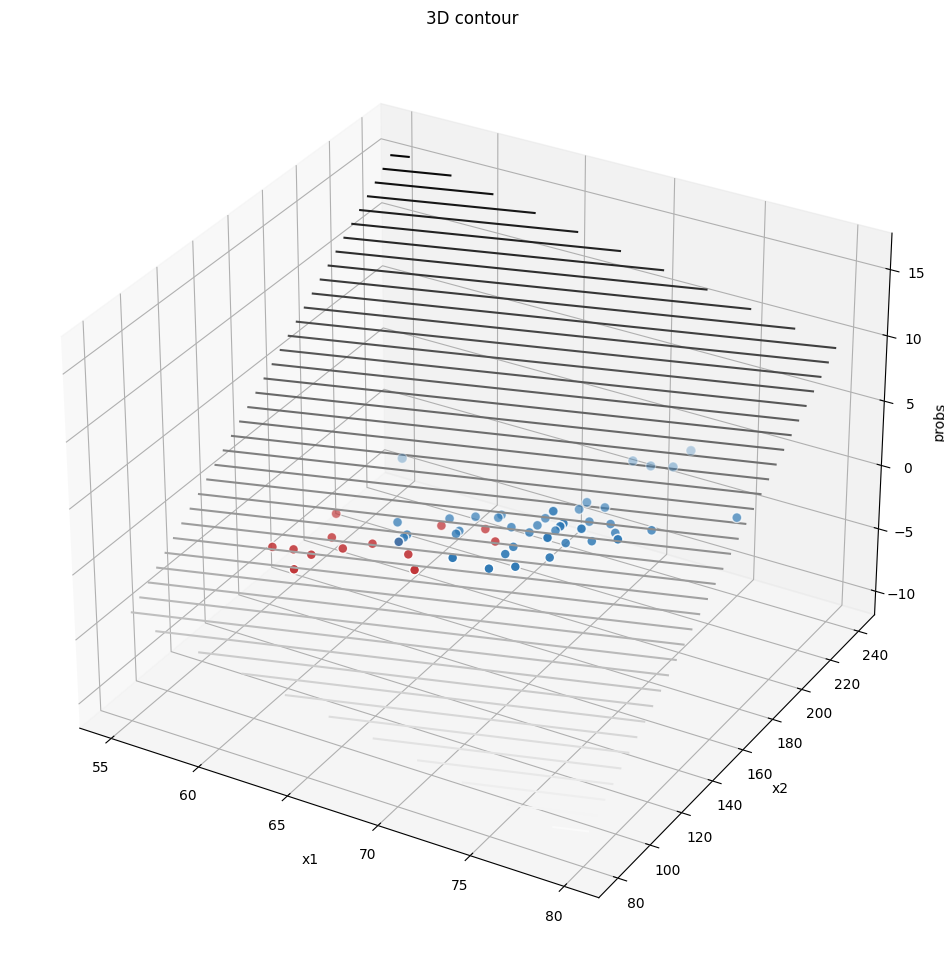

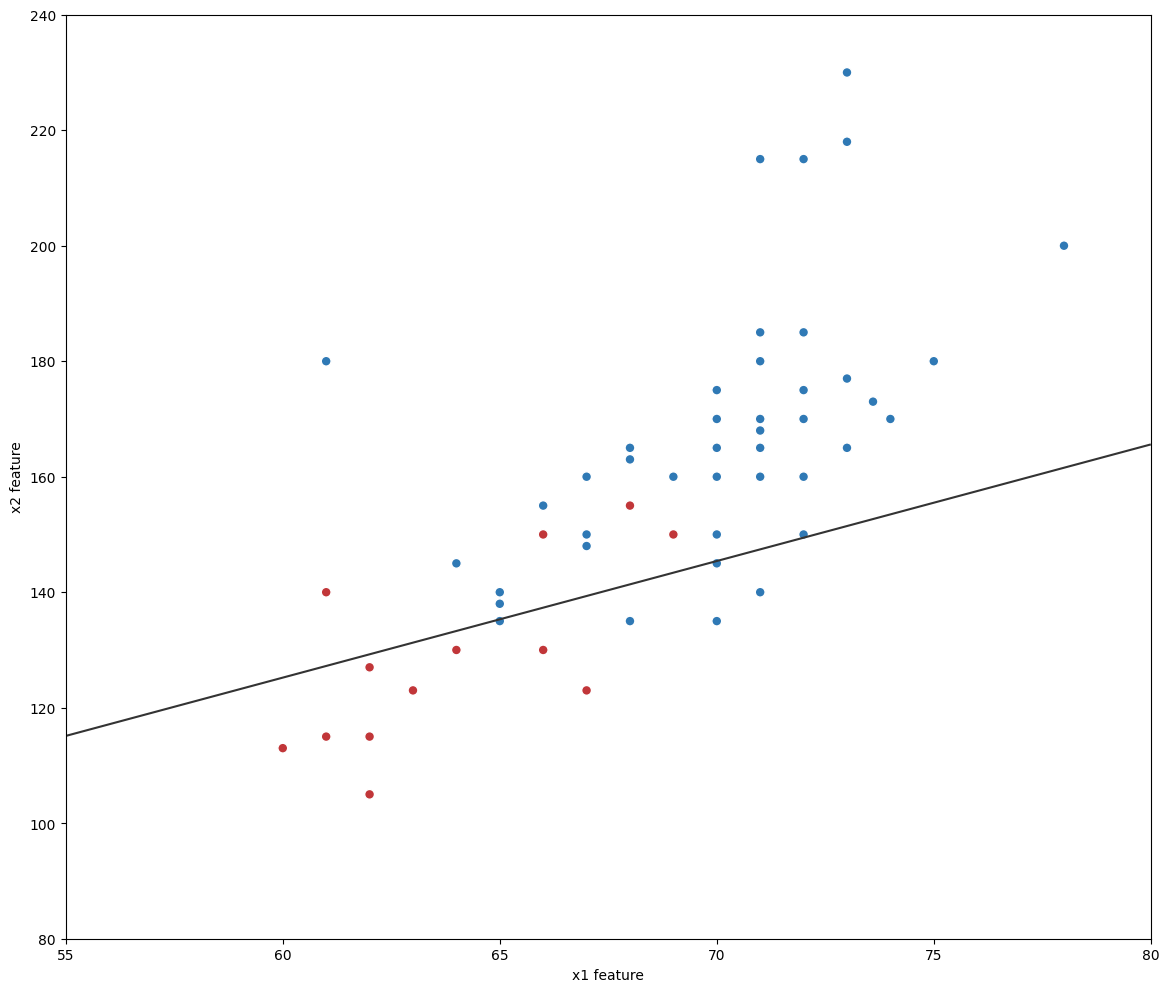

In [ ]:
df=pd.read_excel('/content/Lab3_data.xls')
X=df.iloc[:,1:]
y=df.iloc[:,0]
lr = LogisticRegression(X,y,epsilon=0.0, learningRate=0.1e-5, maxIteration=100000)
lr.fit()
lr.plot()
lr.plot3D()
lr.scatterPlt()